## 이미지 색상 수 줄이기
일반적으로 색상은 빨강, 녹색, 파랑(RGB)로 표현됩니다. 각 색상을 몇 비트(bit)로 표현하느냐에 따라서 색상의 차이를 좀 더 정밀하게 표현할 수 있습니다.

대체로 RGB각각 8bits로 많은 색상을 표현할 수 있는데, 실제 표현 가능한 색상의 종류는 16,777,216(256 x 256 x 256)나 됩니다. 하지만 온라인으로 배포되는 이미지는 대부분 1.6천만개의 색상을 사용하지 않습니다.

위성영상, 의료영상등은 색상의 미세한 차이가 매우 중요하기 때문에, 이를 표현할 수 있도록 한 색상당 값의 표현 범위를 0 ~ 65535(16bits)혹은 0 ~ 4,294,967,295(32bits)로 정하기도 합니다.

K-Means를 이용해 이미지의 색상 수를 줄이는 방법을 살펴보겠습니다.

원본 이미지
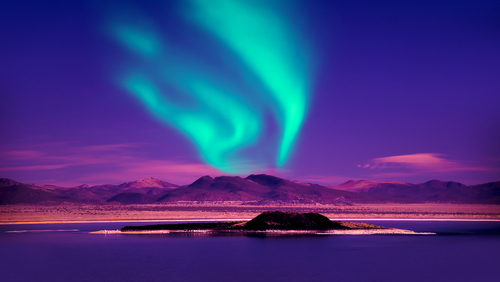

K-means(k = 32)를 적용한 이미지
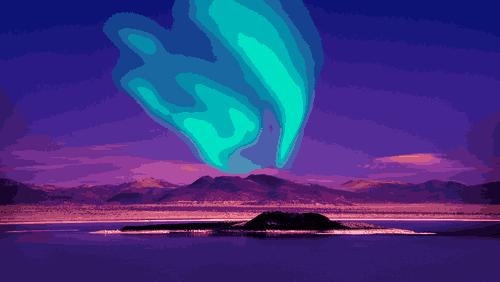

## 따라해보기

코드를 완성한 후 게시판에 점수와 결과 이미지를 올려주세요. 가장 높은 점수를 받은 사람 중 몇 분을 추첨하여 상품을 드립니다 :)

1. (이미지 불러오기) Pillow 라이브러리를 이용해 png, jpg타입의 이미지를 불러옵니다. `ìmg_data[0][0]`는 각각 Red, Green, Blue가 0 ~ 255 범위로 담겨있습니다.
   
1. (K-means 구현하기) `pick_seed()` 함수를 이용해 초기 Centroid를 구합니다. `regress()` 함수는 클러스터를 할당(`allocate_cluster`)하고 새로운 Centroid를 계산(`recalc_centroids`)합니다. 
      
1. (Image에 반영하기) 할당된 Cluster 번호를 참조하여 해당하는 Centroid값으로 대치합니다. 이 작업이 끝나면 이미지가 압축됩니다.
      
1. (Image 다시 만들기) 벡터를 `uint8` 타입으로 변환한 후 이미지로 다시 변환합니다. 

## 팁

* 초기 Centroid를 잘 정해야 Cluster를 명확하게 나눌 수 있습니다.

* 이미지의 색상 분포를 보고, 색상이 한쪽으로 밀집되어 있다면 분포를 고르게 바꿔보세요. 자세한 방법은 [Histogram Equalization](https://stackoverflow.com/questions/28518684/histogram-equalization-of-grayscale-images-with-numpy) 기법을 참고하세요.

In [3]:
from PIL import Image
import numpy as np
# import elice_utils

def main():
    """
    불러온 이미지를 RGB 값을 갖는 3차원 벡터로 변환합니다.
    """
    
    # 이미지를 불러옵니다.
    filenames = ["data_aurora.jpg", "data_raccoon.jpg"]
    img = Image.open(filenames[0])
    img = img.convert("RGB")
    
    # 이미지를 NumPy 배열로 변환합니다. (높이, 넓이, 3) 차원의 행렬로 변환하여 돌려줍니다.
    image_vector = np.asarray(img)
    prep_image_vector = preprocess(image_vector)
    
    # K-means의 K값을 설정합니다.
    K = 32
    
    new_image, clusters, centroids = kmeans(prep_image_vector, K)
    new_image = postprocess(new_image)
    
    # 변환된 벡터의 타입을 처리된 이미지와 같이 8bits로 설정합니다.
    new_image = new_image.astype("uint8")
    # 데이터를 이미지로 다시 변환합니다. 
    new_img = Image.fromarray(new_image, "RGB")
    # 이미지를 저장하고 실행결과를 출력합니다.
    new_img.save("image1out.jpg")
#     elice = elice_utils.EliceUtils()
#     elice.send_image("image1out.jpg")
    
    # 점수를 확인합니다.
#     print("Score = %.2f" % elice.calc_score(image_vector, new_image))
    return


def kmeans(image_vector, K = 32):
    """
    클러스터링을 시작합니다. pick_seed를 이용해 초기 Centroid를 구합니다.
    regress는 이용해 클러스터를 할당(allocate_cluster)하고 새로운 Centroid를 계산(recalc_centroids)합니다. 
    """
    
    clusters = np.zeros((image_vector.shape[:2]))
    centroids = np.array(pick_seed(image_vector, K))
  
    while True:
        new_clusters, new_centroids = regress(image_vector, centroids)
        if np.all(clusters == new_clusters):
            break
        clusters, centroids = new_clusters, new_centroids
  
    new_image = np.zeros(image_vector.shape)
  
    for i in range(K):
        new_image[clusters == i] = centroids[i]
  
    return new_image, clusters, centroids


def regress(image_vector, centroids):
    new_clusters = allocate_cluster(image_vector, centroids)
    new_centroids = recalc_centroids(image_vector, new_clusters, centroids.shape[0])
    
    return new_clusters, new_centroids


def pick_seed(image_vector, K):
    """
    image_vector로부터 K개의 점을 선택하여 리턴해주세요!    
    """
    
    centroids = np.zeros((K, image_vector.shape[2]))
    
    
    return centroids

def allocate_cluster(image_vector, centroids):
    height, width, _ = image_vector.shape
    clusters = np.zeros((height, width))
    
    """
    주어진 Centroid에 따라 새로운 클러스터에 할당해주세요.
    
    예를들어, 0행 0열의 pixel이 3번 Centroid에 가깝다면, clusters[0][0] = 3 이라고 채웁니다.
    
    """
    
    return clusters
    
def recalc_centroids(image_vector, clusters, K):
    centroids = np.zeros((K, image_vector.shape[2]))
    """
    Cluster별로 새로운 centroid를 구해서 되돌려줍니다.
    
    """
    
    return centroids
    
def preprocess(image_vector):
    """
    이미지 전처리 함수
    
    이 함수를 필히 작성하지 않아도 동작합니다.
    """
    return image_vector
    
def postprocess(image_vector):
    """
    이미지 후처리 함수
    
    이 함수를 필히 작성하지 않아도 동작합니다.
    """
    return image_vector
  
if __name__ == "__main__":
    main()